In [ ]:
!git clone https://github.com/PreethiGuru/Online-Shoppers-Purchasing-Intention.git

In [ ]:
!pip install sklearn
!pip install pandas
!pip install numpy
!pip install matplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

In [ ]:
# Read our dataset
Data = pd.read_csv('/content/Online-Shoppers-Purchasing-Intention/online_shoppers_intention.csv')

In [ ]:
Data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
Data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
# Data Preprocessing
Data.isnull().sum()


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
Data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



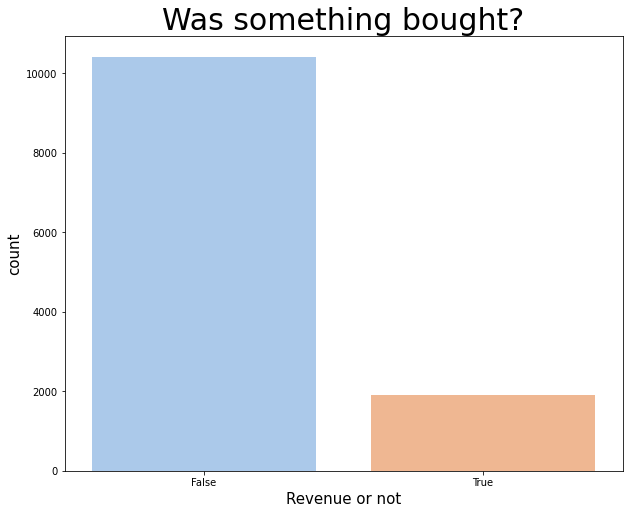

In [ ]:
# Checking the distribution of customers on Revenue

plt.rcParams['figure.figsize'] = (10, 8)

sns.countplot(Data['Revenue'], palette = 'pastel')
plt.title('Was something bought?', fontsize = 30)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

In [ ]:
y = Data["Revenue"]
X = pd.get_dummies(Data)
X.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Data['Revenue'] = le.fit_transform(Data['Revenue'])
Data['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [ ]:
# Removing the target column revenue from X
X = X.drop(['Revenue', 'OperatingSystems', 'Browser', 'Region', 'TrafficType'], axis = 1)


# Checking the shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (12330, 24)
Shape of y: (12330,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
model_lr = logistic_regression.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Training Accuracy : 0.8817923763179237
Testing Accuracy : 0.889294403892944


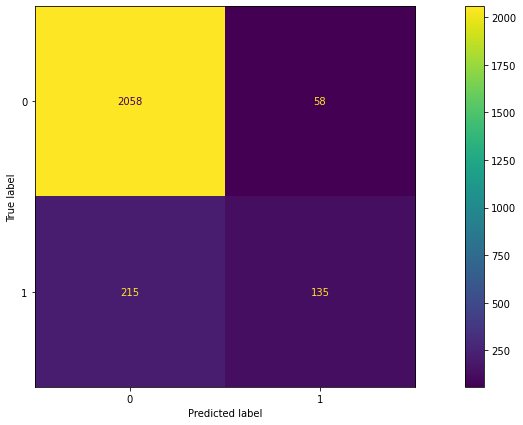

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2116
           1       0.70      0.39      0.50       350

    accuracy                           0.89      2466
   macro avg       0.80      0.68      0.72      2466
weighted avg       0.88      0.89      0.88      2466



In [ ]:
print("Training Accuracy :", model_lr.score(X_train, y_train))
print("Testing Accuracy :", model_lr.score(X_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_lr.classes_)
disp.plot()
plt.show()

# classification report
cr = classification_report(y_test, y_pred_lr)
print(cr)

In [ ]:
# Linear SVM Model
from sklearn.svm import LinearSVC
model_SVM_lin = LinearSVC(random_state = 0, dual = False)
model_SVM_lin.fit(X_train, y_train)
y_pred_SVM_lin = model_SVM_lin.predict(X_test)

Training Accuracy : 0.879257907542579
Testing Accuracy : 0.8864557988645579


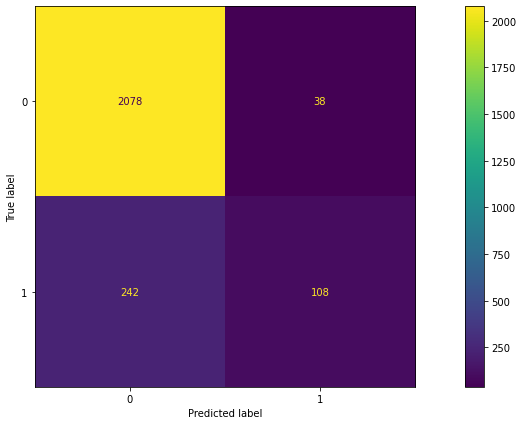

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2116
           1       0.74      0.31      0.44       350

    accuracy                           0.89      2466
   macro avg       0.82      0.65      0.69      2466
weighted avg       0.87      0.89      0.87      2466



In [ ]:
print("Training Accuracy :", model_SVM_lin.score(X_train, y_train))
print("Testing Accuracy :", model_SVM_lin.score(X_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_SVM_lin)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_SVM_lin.classes_)
disp.plot()
plt.show()

# classification report
cr = classification_report(y_test, y_pred_SVM_lin)
print(cr)

In [ ]:
# Quadratic SVM Model
from sklearn.svm import SVC
model_SVM_quad = SVC(kernel='poly', degree = 2, random_state = 0)
model_SVM_quad.fit(X_train, y_train)
y_pred_SVM_quad = model_SVM_quad.predict(X_test)

Training Accuracy : 0.8427615571776156
Testing Accuracy : 0.8576642335766423


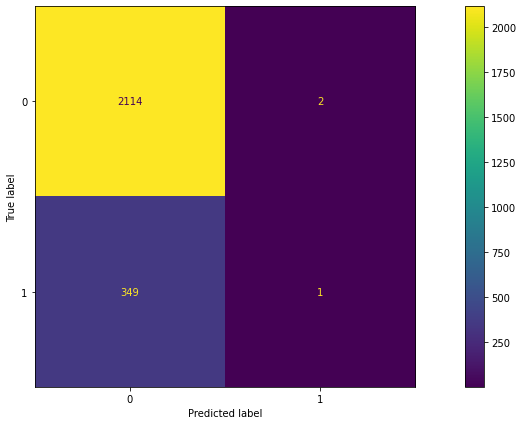

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2116
           1       0.33      0.00      0.01       350

    accuracy                           0.86      2466
   macro avg       0.60      0.50      0.46      2466
weighted avg       0.78      0.86      0.79      2466



In [ ]:
print("Training Accuracy :", model_SVM_quad.score(X_train, y_train))
print("Testing Accuracy :", model_SVM_quad.score(X_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_SVM_quad)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_SVM_quad.classes_)
disp.plot()
plt.show()

# classification report
cr = classification_report(y_test, y_pred_SVM_quad)
print(cr)

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

Training Accuracy : 0.8929440389294404
Testing Accuracy : 0.8726682887266829


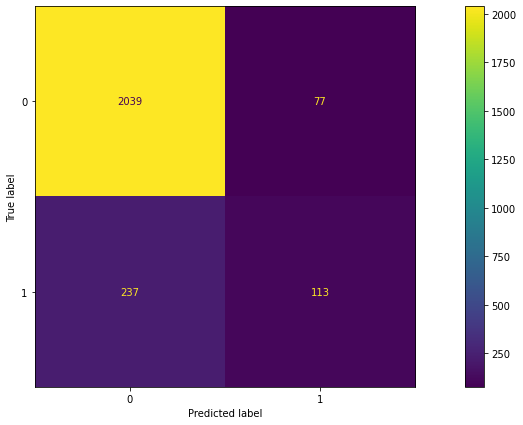

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2116
           1       0.59      0.32      0.42       350

    accuracy                           0.87      2466
   macro avg       0.75      0.64      0.67      2466
weighted avg       0.85      0.87      0.86      2466



In [ ]:
print("Training Accuracy :", model_knn.score(X_train, y_train))
print("Testing Accuracy :", model_knn.score(X_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_knn.classes_)
disp.plot()
plt.show()

# classification report
cr = classification_report(y_test, y_pred_knn)
print(cr)

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf = model_rf.fit(X_train,y_train)
y_pred_rf = model_rf.predict(X_test)

Training Accuracy : 0.9997972424979724
Testing Accuracy : 0.9047039740470397


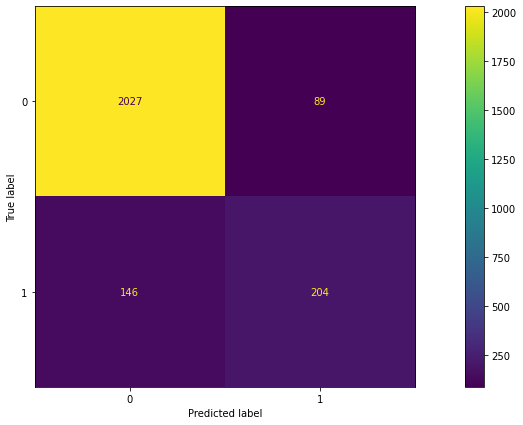

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2116
           1       0.70      0.58      0.63       350

    accuracy                           0.90      2466
   macro avg       0.81      0.77      0.79      2466
weighted avg       0.90      0.90      0.90      2466



In [ ]:
print("Training Accuracy :", model_rf.score(X_train, y_train))
print("Testing Accuracy :", model_rf.score(X_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rf.classes_)
disp.plot()
plt.show()

# classification report
cr = classification_report(y_test, y_pred_rf)
print(cr)

In [ ]:
# Neural Network Classifier
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
model_nn = Sequential()
model_nn.add(Dense(units = 64, activation = 'relu', input_dim = 24))
model_nn.add(Dropout(0.2))
model_nn.add(Dense(units = 32, activation = 'relu'))
model_nn.add(Dropout(0.2))
model_nn.add(Dense(units = 16, activation = 'relu'))
model_nn.add(Dropout(0.2))
model_nn.add(Dense(units = 1, activation = 'sigmoid'))
model_nn.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_nn.fit(X_train, y_train, batch_size = 32, epochs = 100, verbose=2)
y_pred_nn = model_nn.predict(X_test)
y_pred_nn = np.round(y_pred_nn).astype(int)

Epoch 1/100
309/309 - 2s - loss: 6.5104 - accuracy: 0.7069 - 2s/epoch - 8ms/step
Epoch 2/100
309/309 - 1s - loss: 0.8302 - accuracy: 0.8108 - 1s/epoch - 4ms/step
Epoch 3/100
309/309 - 1s - loss: 0.5716 - accuracy: 0.8403 - 1s/epoch - 4ms/step
Epoch 4/100
309/309 - 1s - loss: 0.5414 - accuracy: 0.8407 - 1s/epoch - 3ms/step
Epoch 5/100
309/309 - 1s - loss: 0.4811 - accuracy: 0.8418 - 1s/epoch - 4ms/step
Epoch 6/100
309/309 - 1s - loss: 0.4465 - accuracy: 0.8444 - 1s/epoch - 3ms/step
Epoch 7/100
309/309 - 1s - loss: 0.4392 - accuracy: 0.8490 - 1s/epoch - 3ms/step
Epoch 8/100
309/309 - 1s - loss: 0.4025 - accuracy: 0.8549 - 1s/epoch - 3ms/step
Epoch 9/100
309/309 - 1s - loss: 0.3934 - accuracy: 0.8589 - 1s/epoch - 3ms/step
Epoch 10/100
309/309 - 1s - loss: 0.3760 - accuracy: 0.8658 - 1s/epoch - 4ms/step
Epoch 11/100
309/309 - 1s - loss: 0.3614 - accuracy: 0.8681 - 1s/epoch - 3ms/step
Epoch 12/100
309/309 - 1s - loss: 0.3524 - accuracy: 0.8711 - 1s/epoch - 3ms/step
Epoch 13/100
309/309 - 1s

In [ ]:
print("Training Accuracy :", model_nn.evaluate(X_train, y_train, verbose=0)[1])
print("Testing Accuracy :", model_nn.evaluate(X_test, y_test, verbose=0)[1])

from tensorflow.math import confusion_matrix
# confusion matrix
disp = confusion_matrix(y_test, y_pred_nn)
print(disp)

# classification report
cr = model_nn.summary()
print(cr)

Training Accuracy : 0.8947688341140747
Testing Accuracy : 0.8990267515182495
tf.Tensor(
[[1992  124]
 [ 125  225]], shape=(2, 2), dtype=int32)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1600      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)      